# LAB 7: Chapter 8: Images, Animation, SymPy

### * Read the chapter carefully, and complete the assignments as follows:

In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import random as rand
from html_movie import movie
from sympy import *

###  <font color='red'> 8.1 Image processing

####  <font color='blue'> Try out the scripts in this section, and answer "YOUR TURN 8A"

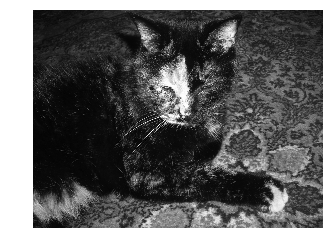

In [8]:
photo = plt.imread('bwCat.tif')
plt.imshow(photo)
plt.set_cmap('gray')
plt.axis('off')
fig = plt.gcf()
fig.set_facecolor('white')

plt.imsave('cat.jpg', photo, cmap='gray')

new_cat = (photo < photo.mean())
# plt.imshow(new_cat)

Explanation: The original photo of the cat was modified to use grayscale for black and white images, get rid of axes and tick marks, get the current figure object, and set the background color to white. Then this image was modified again (uncomment the last line to see the changes). Effectively, the photo became whiter/lighter in color (averaging the colors).

###  <font color='red'> 8.2 Data as an image: 

####  <font color="blue"> Try out the example script, and explore different ways of displaying images and data sets as suggested at the end of this section (show and describe a couple of features you changed)

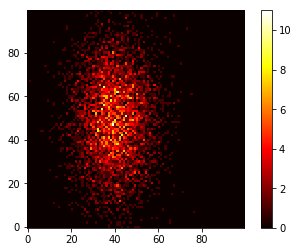

In [12]:
plt.figure()
x = np.random.randn(5000) - 1
y = 2 * np.random.randn(5000)
counts, x_bins, y_bins = np.histogram2d( x, y, bins=[100,100], range=[(-5,5), (-5,5)])
plt.imshow(counts.transpose(), origin='lower', cmap='hot')
plt.colorbar()

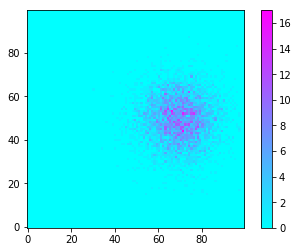

In [20]:
plt.figure()
x = np.random.randn(5000) + 2 #Line 2 changed
y = 1 * np.random.randn(5000) #Line 3 changed
counts, x_bins, y_bins = np.histogram2d( x, y, bins=[100,100], range=[(-5,5), (-5,5)])
plt.imshow(counts.transpose(), origin='lower', cmap='cool') #Line 5 changed
plt.colorbar()

Features that were changed: The change in line 2 from subtracting 1 to adding 2 to the x values means instead of shifting the image to the left, as in the original, we have shifted the image over to the right. The change in line 3 from multiplying the y values by 1 instead of 2, the image/data becomes circular (proportional to x, instead of elongated and twice as tall as it is wide in the original). Finally, the change to line 5 was in making the colormap follow the 'cool' sequence instead of 'hot', as in the original.  

###  <font color='red'> 8.3 Animation:

####  <font color='blue'> 8.3.1 Create a random walk movie by using and exploring the example provided. Make sure you understand how the script works!

In [ ]:
num_steps = 100
plt.close('all')
bound = 20
fig = plt.figure()
ax = plt.axes(xlim=(-bound, bound), ylim=(-bound, bound))
(my_line,) = ax.plot([], [], lw=2)
(my_point,) = ax.plot([], [], 'ro', ms=9)
x_steps = 2*(rand(num_steps) < 0.5) - 1
y_steps = 2*(rand(num_steps) < 0.5) - 1
x_coordinate = x_steps.cumsum()
y_coordinate = y_steps.cumsum()

def get_step(n, x, y, this_line, this_point):
    this_line.set_data(x[:n+1], y[:n+1])
    this_point.set_data(x[n], y[n])

my_movie = animation.FuncAnimation(fig, get_step, frames=num_steps, fargs=(x_coordinate, y_coordinate, my_line, my_point))

####  <font color='blue'> 8.3.2 Try to reproduce the HTML movie of traveling waves as described in this section

In [21]:
def gaussian(s, center=0.0, spread=1.0):
    return np.exp(-2 * (s - center)**2 / spread**2)

x_min, x_max = -4.0, 4.0
y_min, y_max = -3.0, 3.0
dx = 0.01
x = np.arange(x_min, x_max + dx, dx)
tmin, tmax = 0.0, 4.0
num_frames = 100
t = np.linspace(tmin, tmax, num_frames)
r_speed = 2.0
r_0 = -4.0
l_speed = -2.0
l_0 = 4.0

plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))
ax.plot([], [], 'b--', lw=1)
ax.plot([], [], 'r--', lw=1)
ax.plot([], [], 'g-', lw=3)
lines = ax.get_lines()

file_name = "{:03d}_movie.jpg"
for i in range(num_frames):
    r_now = r_0 + r_speed * t[i]
    l_now = l_0 + l_speed * t[i]
    yR = gaussian(x, r_now)
    yL = -gaussian(x, l_now)
    lines[0].set_data(x, yR)
    lines[1].set_data(x, yL)
    lines[2].set_data(x, yR + yL)
    plt.savefig(file_name.format(i))

movie(input_files='*.jpg', output_file='movie.html')




Found 101 files of the format *.jpg.

Making HTML code for displaying 000_movie.jpg, 001_movie.jpg, 002_movie.jpg, 003_movie.jpg, 004_movie.jpg, 005_movie.jpg, 006_movie.jpg, 007_movie.jpg, 008_movie.jpg, 009_movie.jpg, 010_movie.jpg, 011_movie.jpg, 012_movie.jpg, 013_movie.jpg, 014_movie.jpg, 015_movie.jpg, 016_movie.jpg, 017_movie.jpg, 018_movie.jpg, 019_movie.jpg, 020_movie.jpg, 021_movie.jpg, 022_movie.jpg, 023_movie.jpg, 024_movie.jpg, 025_movie.jpg, 026_movie.jpg, 027_movie.jpg, 028_movie.jpg, 029_movie.jpg, 030_movie.jpg, 031_movie.jpg, 032_movie.jpg, 033_movie.jpg, 034_movie.jpg, 035_movie.jpg, 036_movie.jpg, 037_movie.jpg, 038_movie.jpg, 039_movie.jpg, 040_movie.jpg, 041_movie.jpg, 042_movie.jpg, 043_movie.jpg, 044_movie.jpg, 045_movie.jpg, 046_movie.jpg, 047_movie.jpg, 048_movie.jpg, 049_movie.jpg, 050_movie.jpg, 051_movie.jpg, 052_movie.jpg, 053_movie.jpg, 054_movie.jpg, 055_movie.jpg, 056_movie.jpg, 057_movie.jpg, 058_movie.jpg, 059_movie.jpg, 060_movie.jpg, 061_movie.jp

###  <font color='red'> 8.4 Analytic Calculations: The Sympy library

####  <font color='blue'> Try out the given script, and briefly comment what each command does.

In [19]:
init_session()
expand( (x + y)**5 )
factor( x**6 - 1 )
pi.n(100)
plot( besselj(0, x), besselj(1, x), (x, 0, 10) )
diff( x*sin(y), x, y )
integrate( cos(x)**2, x )
integrate( exp(-x**2), (x, -oo, oo) )
Sum( k**3, (k, 0, m) ).doit().factor()
dsolve( f(x).diff(x) + f(x) - x, f(x) ).simplify()
limit( sin(x)/x, x, 0 )

IPython console for SymPy 1.3 (Python 3.7.1-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



Command: init_session()
What It Does: Defines several variables and fucntions (must be present for the other commands to work)

Command: expand( (x + y)**5 )
What It Does: Expands the polynomial function (canonical form of a sum of monomials)

Command: factor( x**6 - 1 )
What It Does: Takes a polynomial and factors it into irreducible factors over the rational numbers

Command: pi.n(100)
What It Does: Gives the number pi with 100 characters (so 3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068)

Command: plot( besselj(0, x), besselj(1, x), (x, 0, 10) )
What It Does: Plots the Bessel function of the first kind J_0(x) (on the x-axis) versus the Bessel function of the first kind J_1(x) (on the y-axis) for x going from 0 to 10

Command: diff( x*sin(y), x, y )
What It Does: Takes the derivative of x*sin(y) with respect to x and y

Command: integrate( cos(x)**2, x )
What It Does: Integrates the function cos(x)**2 with respect to x (this is an indefinite integral, aka no bounds)

Command: integrate( exp(-x**2), (x, -oo, oo) )
What It Does: Integrates the function exp(-x**2) with respect to x on the bounds -infinity to infinity

Command: Sum( k**3, (k, 0, m) ).doit().factor()
What It Does: Computes the simplified summation of k**3 where k goes from 0 to m

Command: dsolve( f(x).diff(x) + f(x) - x, f(x) ).simplify()
What It Does: Solves any (supported) kind of ordinary differential equation and system of ordinary differential equations. The ordinary differential equation here is f(x).diff(x) + f(x) - x. f(x) is the function of one variable whose derivatives in that variable make up the ordinary differential equation. Simplify() enables simplification

Command: limit( sin(x)/x, x, 0 )
What It Does: Computes the limit of the function sin(x)/x as x goes to 0 